IMPORTS

In [59]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import json
%matplotlib inline

LOADING THE DATASET

In [22]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    df = pd.read_csv(path, header=0, delimiter=',')
    return df

# Carreguem dataset d'exemple
df = load_dataset('tmdb_5000_movies.csv')
data = df.values

x = data[:, :2]
y = data[:, 2]

#print("Dimensionalitat de la BBDD:", dataset.shape)
#print("Dimensionalitat de les entrades X", x.shape)
#print("Dimensionalitat de l'atribut Y", y.shape)

DATACLEARING AND FORMATTING

In [23]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.438,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.200,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.083,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.900,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.377,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.000,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.300,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.313,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.600,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.927,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.100,2124


COLUMNS TO BE DROPPED
original_title: since title column is also included and original_title column has non-ASCII characters, it can be dropped.
homepage: there will be no analysis depending on the homepage of the movie, this column is uselesss for this specific analysis
overview & tagline: no text analysis will be made in this notebook. For retrieving the most important words, keywords.csv can be used
spoken_languages: original_language is included, no need
keywords:

print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

In [ ]:
#genres, keywords, production_companies, production_

In [ ]:
#observem que les següents columnes contenen llistes de diccionaris, amb id i noms; així doncs, realment només ens interessa el nom (genere, etc..)
#per tant, primer de tot transformem les columnes a llistes de generes, productors,...

In [24]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [28]:
drop_df = ["homepage", "overview", "original_title", 
           "spoken_languages", "tagline", "keywords"]
df = df.drop(drop_df, axis=1) # drops the selected columns
df = df.drop_duplicates(keep='first') # removes the duplicates from existing dataframe
df.dropna(how="all",inplace=True) # if each column is NaN or null in a row, drops this row

In [29]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   original_language     4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4802 non-null   object 
 8   revenue               4803 non-null   int64  
 9   runtime               4801 non-null   float64
 10  status                4803 non-null   object 
 11  title                 4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 562.9+ KB


observem que el dataset, ara sembla estar "maco" --> no conté columnes amb valors nulls / vuits

In [30]:
df["id"] =pd.to_numeric(df['id'], errors='coerce', downcast="integer")
df["popularity"] =pd.to_numeric(df['popularity'], errors='coerce', downcast="float") 
df["budget"] =pd.to_numeric(df['budget'], errors='coerce', downcast="float") 
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

In [32]:
df.head(5)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year
0,237000000.000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.438,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.000,Released,Avatar,7.200,11800,2009.000
1,300000000.000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.083,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.000,Released,Pirates of the Caribbean: At World's End,6.900,4500,2007.000
2,245000000.000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,107.377,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.000,Released,Spectre,6.300,4466,2015.000
3,250000000.000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,112.313,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.000,Released,The Dark Knight Rises,7.600,9106,2012.000
4,260000000.000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,43.927,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.000,Released,John Carter,6.100,2124,2012.000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   float32       
 1   genres                4803 non-null   object        
 2   id                    4803 non-null   int32         
 3   original_language     4803 non-null   object        
 4   popularity            4803 non-null   float32       
 5   production_companies  4803 non-null   object        
 6   production_countries  4803 non-null   object        
 7   release_date          4802 non-null   datetime64[ns]
 8   revenue               4803 non-null   int64         
 9   runtime               4801 non-null   float64       
 10  status                4803 non-null   object        
 11  title                 4803 non-null   object        
 12  vote_average          4803 non-null   float64       
 13  vote_count        

Since there is 1 null release_date/release_year entries and filling that is not logical, they will be dropped, too. 
And also 1 row that has null as in column release_date may be dropped.
For runtime, again a similar case occurs and it can be handled by filling NaN values with the mean.

In [34]:
df.dropna(subset=["release_date"],inplace=True)
df.dropna(subset=["release_year"],inplace=True)
df["runtime"].fillna(df["runtime"].mean(), inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4802 non-null   float32       
 1   genres                4802 non-null   object        
 2   id                    4802 non-null   int32         
 3   original_language     4802 non-null   object        
 4   popularity            4802 non-null   float32       
 5   production_companies  4802 non-null   object        
 6   production_countries  4802 non-null   object        
 7   release_date          4802 non-null   datetime64[ns]
 8   revenue               4802 non-null   int64         
 9   runtime               4802 non-null   float64       
 10  status                4802 non-null   object        
 11  title                 4802 non-null   object        
 12  vote_average          4802 non-null   float64       
 13  vote_count        

AS WE CAN SEE, NOW WE HAVE OUR DATASET CORRECTLY
There are some cells, which have stringified list of json inputs such as genres, production_companies and production_countries. For easier processing, these have to be converted into list of inputs

In [37]:
# converts json list to list of inputs (from the label specified with 'wanted' parameter) --> funció trobada a internet
def json_to_arr(cell, wanted = "name"): 
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

In [38]:
df[['genres']] = df[['genres']].applymap(json_to_arr)
df[['production_countries']] = df[['production_countries']].applymap(lambda row: 
                                                                     json_to_arr(row, "iso_3166_1"))
df[['production_companies']] = df[['production_companies']].applymap(json_to_arr)


In [41]:
df.head(10)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year
0,237000000.000,"[Action, Adventure, Fantasy]",19995,en,150.438,"[Ingenious Film Partners, Twentieth Century Fo...","[US, GB]",2009-12-10,2787965087,162.000,Released,Avatar,7.200,11800,2009.000
1,300000000.000,"[Adventure, Fantasy, Action]",285,en,139.083,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[US],2007-05-19,961000000,169.000,Released,Pirates of the Caribbean: At World's End,6.900,4500,2007.000
2,245000000.000,"[Action, Adventure, Crime]",206647,en,107.377,"[Columbia Pictures, Danjaq, B24]","[GB, US]",2015-10-26,880674609,148.000,Released,Spectre,6.300,4466,2015.000
3,250000000.000,"[Action, Crime, Drama]",49026,en,112.313,"[Legendary Pictures, Warner Bros., DC Entertai...",[US],2012-07-16,1084939099,165.000,Released,The Dark Knight Rises,7.600,9106,2012.000
4,260000000.000,"[Action, Adventure, Science Fiction]",49529,en,43.927,[Walt Disney Pictures],[US],2012-03-07,284139100,132.000,Released,John Carter,6.100,2124,2012.000
5,258000000.000,"[Fantasy, Action, Adventure]",559,en,115.700,"[Columbia Pictures, Laura Ziskin Productions, ...",[US],2007-05-01,890871626,139.000,Released,Spider-Man 3,5.900,3576,2007.000
6,260000000.000,"[Animation, Family]",38757,en,48.682,"[Walt Disney Pictures, Walt Disney Animation S...",[US],2010-11-24,591794936,100.000,Released,Tangled,7.400,3330,2010.000
7,280000000.000,"[Action, Adventure, Science Fiction]",99861,en,134.279,"[Marvel Studios, Prime Focus, Revolution Sun S...",[US],2015-04-22,1405403694,141.000,Released,Avengers: Age of Ultron,7.300,6767,2015.000
8,250000000.000,"[Adventure, Fantasy, Family]",767,en,98.886,"[Warner Bros., Heyday Films]","[GB, US]",2009-07-07,933959197,153.000,Released,Harry Potter and the Half-Blood Prince,7.400,5293,2009.000
9,250000000.000,"[Action, Adventure, Fantasy]",209112,en,155.790,"[DC Comics, Atlas Entertainment, Warner Bros.]",[US],2016-03-23,873260194,151.000,Released,Batman v Superman: Dawn of Justice,5.700,7004,2016.000


In [44]:
a = 0
for i in df['revenue']:
    if i ==0:
        a=a+1
print('revenue',a)

b = 0
for i in df['budget']:
    if i ==0:
        b=b+1
print('budget',b)

revenue 1426
budget 1036


Many entries of budget and revenue are 0. However, instead of 0, having NaN is more logical for seeing how many entries are actually available.

In [50]:
df['budget'] = df['budget'].replace(0,pd.np.nan)
df['revenue'] = df['revenue'].replace(0,pd.np.nan)

C:\Users\andre\AppData\Local\Temp\ipykernel_1416\4243403249.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['budget'] = df['budget'].replace(0,pd.np.nan)
C:\Users\andre\AppData\Local\Temp\ipykernel_1416\4243403249.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['revenue'] = df['revenue'].replace(0,pd.np.nan)


In [61]:
a = 0
for i in df['budget']:
    if math.isnan(i) :
        a=a+1
print(a)
print(len(df['budget']))
        

1036
4802


In [51]:
print("Number of rows with budget < 100: ", len((df[(df["budget"].notna())&(df["budget"] < 100)])))
print("Number of rows with budget > 100 and < 1000: ", len(df[(df["budget"].notna())&(df["budget"] > 100)
                                                              &(df["budget"] < 1000)]))
print("Number of rows with budget > 1000 and < 10000: ", len(df[(df["budget"].notna())&(df["budget"] > 1000)
                                                              &(df["budget"] < 10000)]))

Number of rows with budget < 100:  23
Number of rows with budget > 100 and < 1000:  8
Number of rows with budget > 1000 and < 10000:  3


There are some rows that have a budget and revenue value, that are not actually scaled. By checking some of the notebooks shared, I have decided to move on with the scaling function below. For example, if the value is 1, then it scales to 1 million. If an example will be given from the true data:

id: 17402
Title: Miami Rhapsody
Production Company: Hollywood Pictures
Date: 1995-01-27
Budget: 6
Revenue: 5 (by looking IMDB, actual revenue can be seen as around 5 million)

In [62]:
def scale_money(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 10000
    elif num >= 1000 and num < 10000:
        return num *100
    else:
        return num

In [63]:
df[['budget', 'revenue']] = df[['budget', 'revenue']].applymap(scale_money)

After these steps, the columns can be osberved to see how many null or NaN entries there are. So, a heatmap and data is below:

<AxesSubplot:>

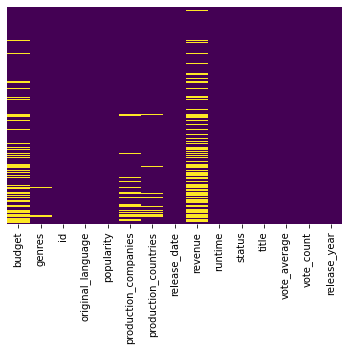

In [65]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [66]:
print("NaN Genres Count: ", len(df[df["genres"].isna()]))
print("NaN Revenue Count: ", len(df[df['revenue'].isna()])) 
print("NaN Budget Count: ", len(df[df['budget'].isna()])) 
print("NaN Production Company Count: ", len(df[df["production_companies"].isna()]))
print("NaN Production Country Count: ", len(df[df["production_countries"].isna()]))

NaN Genres Count:  27
NaN Revenue Count:  1426
NaN Budget Count:  1036
NaN Production Company Count:  350
NaN Production Country Count:  173


In [ ]:
plt.figure()
plt.title("Histograma de l'atribut 0")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,0], bins=11, range=[np.min(x[:,0]), np.max(x[:,0])], histtype="bar", rwidth=0.8)

In [ ]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

In [ ]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(dataset)